# Indian Agricultural Crop Yield Predictions

## Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv('agriculture.csv')
df.head()

State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296

In [4]:
df.tail()

State     District Crop     Year Season  Area Area Units  \
345402  Manipur  IMPHAL WEST  NaN  2019-20   Rabi   NaN    Hectare   
345403  Manipur     SENAPATI  NaN  2019-20   Rabi   NaN    Hectare   
345404  Manipur   TAMENGLONG  NaN  2019-20   Rabi   NaN    Hectare   
345405  Manipur      THOUBAL  NaN  2019-20   Rabi   NaN    Hectare   
345406  Manipur       UKHRUL  NaN  2019-20   Rabi   NaN    Hectare   

        Production Production Units  Yield  
345402         NaN           Tonnes    NaN  
345403         NaN           Tonnes    NaN  
345404         NaN           Tonnes    NaN  
345405         NaN           Tonnes    NaN  
345406         NaN           Tonnes    NaN

In [5]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (345407, 10)


# Preprocessing of the dataset

In [6]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [8]:
# to check the unique values
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** State *********************************

{'Jammu and Kashmir', 'Goa', 'Maharashtra', 'Rajasthan', 'Dadra and Nagar Haveli', 'Delhi', 'Laddakh', 'Andaman and Nicobar Islands', 'Bihar', 'Karnataka', 'Haryana', 'Himachal Pradesh', 'Telangana', 'Gujarat', 'Madhya Pradesh', 'Chandigarh', 'Puducherry', 'Odisha', 'Mizoram', 'Uttar Pradesh', 'Tripura', 'Assam', 'Kerala', 'Nagaland', 'Uttarakhand', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Meghalaya', 'Daman and Diu', 'Sikkim', 'Tamil Nadu', 'West Bengal', 'Manipur', 'Andhra Pradesh', 'Chhattisgarh'}

****************************** District *********************************

{'AURANGABAD', 'LATUR', 'SIWAN', 'MEERUT', 'GUMLA', 'FIROZABAD', 'PALAMU', 'SHAMLI', 'REWA', 'NORTH GARO HILLS', 'WEST KARBI ANGLONG', 'CHAMARAJANAGARA', 'JALANDHAR', 'SOUTH ANDAMANS', 'KURUKSHETRA', 'INDORE', 'DURG', 'LATEHAR', 'DINDIGUL', 'THOUBAL', 'UTTAR KANNAD', 'KANDHAMAL', 'SITAPUR', 'S', 'SAWAI MADHOPUR', 'DEOGHAR', 'SHIMOGA', 'KALA

In [9]:
# Check the duplicates record
df.duplicated().sum()

0

In [10]:
df.describe()

Area    Production          Yield
count  3.453740e+05  3.404140e+05  345374.000000
mean   1.167019e+04  9.583711e+05      79.407569
std    4.583843e+04  2.152986e+07     916.628744
min    4.000000e-03  0.000000e+00       0.000000
25%    7.400000e+01  8.700000e+01       0.546742
50%    5.320000e+02  7.170000e+02       1.000000
75%    4.110000e+03  7.176000e+03       2.467080
max    8.580100e+06  1.597800e+09   43958.333330

# Visualization

# State wise analysis of agricultural production

In [15]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

District  \
State                                                                            
Tamil Nadu                   COIMBATORECOIMBATOREDHARMAPURIDHARMAPURIDINDIG...   
West Bengal                  24 PARAGANAS NORTH24 PARAGANAS NORTH24 PARAGAN...   
Karnataka                    BAGALKOTBAGALKOTBANGALORE RURALBANGALORE RURAL...   
Assam                        BARPETABARPETABARPETABONGAIGAONBONGAIGAONBONGA...   
Andhra Pradesh               ANANTAPURANANTAPURANANTAPUREAST GODAVARIEAST G...   
Kerala                       ALAPPUZHAALAPPUZHAALAPPUZHAERNAKULAMERNAKULAME...   
Puducherry                   MAHEMAHEPONDICHERRYPONDICHERRYPONDICHERRYKARAI...   
Uttar Pradesh                AGRAAGRAALIGARHALIGARHALLAHABADALLAHABADAMBEDK...   
Andaman and Nicobar Islands  NICOBARSNICOBARSNICOBARSNORTH AND MIDDLE ANDAM...   
Goa                          GoaGoaGoaGoaGoaGoaGoaGoaGoaGoaGoaGoaGoaGoaGoaG...   
Madhya Pradesh               ANUPPURASHOKNAGARBALAGHATBALAGHATBALAGHATBARWA...   
Telangana                    ADILABADADILABADADILABADADILABADADILABADADILAB...   
Bihar                        ARARIAARARIAARARIAARWALAURANGABADAURANGABADAUR...   
Gujarat                      AHMADABADAHMADABADAHMADABADAMRELIAMRELIAMRELIA...   
Maharashtra                  AHMEDNAGARAHMEDNAGARAHMEDNAGARAKOLAAKOLAAKOLAA...   
Rajasthan                    AJMERAJMERAJMERALWARALWARALWARBANSWARABANSWARA...   
Odisha                       ANUGULANUGULBALANGIRBALANGIRBALANGIRBALESHWARB...   
Haryana                      AMBALAAMBALAAMBALABHIWANIBHIWANIBHIWANIFARIDAB...   
Chhattisgarh                 BASTARBASTARBASTARBILASPURBILASPURBILASPURDANT...   
Punjab                       AMRITSARAMRITSARAMRITSARBATHINDAFARIDKOTFARIDK...   
Uttarakhand                  CHAMOLICHAMOLICHAMOLICHAMPAWATDEHRADUNDEHRADUN...   
Nagaland                     DIMAPURDIMAPURKOHIMAKOHIMAKOHIMAMOKOKCHUNGMOKO...   
Manipur                      SENAPATIBISHNUPURBISHNUPURBISHNUPURCHANDELCHAN...   
Arunachal Pradesh            CHANGLANGCHANGLANGCHANGLANGDIBANG VALLEYDIBANG...   
Meghalaya                    EAST GARO HILLSEAST GARO HILLSEAST JAINTIA HIL...   
Jharkhand                    CHATRACHATRADUMKADUMKAGARHWAGARHWAGODDAGODDAGU...   
Tripura                      DHALAIDHALAIDHALAINORTH TRIPURANORTH TRIPURANO...   
Himachal Pradesh             BILASPURBILASPURKANGRAKULLUMANDISHIMLASHIMLASO...   
Jammu and Kashmir            DODADODAJAMMUJAMMUJAMMUKATHUAKATHUAKATHUARAJAU...   
Mizoram                      AIZAWLAIZAWLAIZAWLCHAMPHAICHAMPHAIKOLASIBKOLAS...   
Dadra and Nagar Haveli       DADRA AND NAGAR HAVELIDADRA AND NAGAR HAVELIDA...   
Delhi                        DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Sikkim                       EAST DISTRICTEAST DISTRICTEAST DISTRICTNORTH D...   
Chandigarh                   CHANDIGARHCHANDIGARHCHANDIGARHCHANDIGARHCHANDI...   
Daman and Diu                Daman and DiuDaman and DiuDaman and DiuDaman a...   
Laddakh                                                                 KARGIL   

                                                                          Crop  \
State                                                                            
Tamil Nadu                   ArecanutArecanutArecanutArecanutArecanutArecan...   
West Bengal                  ArecanutArecanutArecanutArecanutArecanutArecan...   
Karnataka                    ArecanutArecanutArecanutArecanutArecanutArecan...   
Assam                        ArecanutArecanutArecanutArecanutArecanutArecan...   
Andhra Pradesh               ArecanutArecanutArecanutArecanutArecanutArecan...   
Kerala                       ArecanutArecanutArecanutArecanutArecanutArecan...   
Puducherry                   ArecanutArecanutBajraBajraBajraBananaBananaBan...   
Uttar Pradesh                Arhar/TurArhar/TurArhar/TurArhar/TurArhar/TurA...   
Andaman and Nicobar Islands  ArecanutArecanutArecanutArecanutArecanutArecan...   
Goa                          ArecanutArecanutArecan

### Observations:
* Annual Rainfall is highest in Chattisgarh but the yield is not the highest.
* West Bengal has the maximum yield
* Uttar Pradesh, Haryana, Maharashtra are using high amount of fertilizer but yield is not high reason can be low annual rainfall

# Season wise analysis

## Observations:
* Area under cultivation in Kharif season is highest, second is Rabi season
* Crops in autumn, summer are not grown over large area
* Yield in India is maximum in Kharif season

# Crop wise Analysis

In [21]:
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape

(5984, 10)

In [24]:
df_yz.head()

State        District       Crop     Year      Season  Area  \
138  Andhra Pradesh       NIZAMABAD  Arhar/Tur  2002-03        Rabi   1.0   
252  Andhra Pradesh      RANGAREDDI      Bajra  2002-03        Rabi   1.0   
266  Andhra Pradesh  VISAKHAPATANAM      Bajra  2002-03        Rabi   2.0   
294  Andhra Pradesh      KARIMNAGAR     Banana  2001-02  Whole Year   1.0   
305  Andhra Pradesh     MAHBUBNAGAR     Banana  2001-02  Whole Year  12.0   

    Area Units  Production Production Units  Yield  
138    Hectare         NaN           Tonnes    0.0  
252    Hectare         NaN           Tonnes    0.0  
266    Hectare         NaN           Tonnes    0.0  
294    Hectare         NaN           Tonnes    0.0  
305    Hectare         NaN           Tonnes    0.0

<Figure size 2500x1500 with 0 Axes>

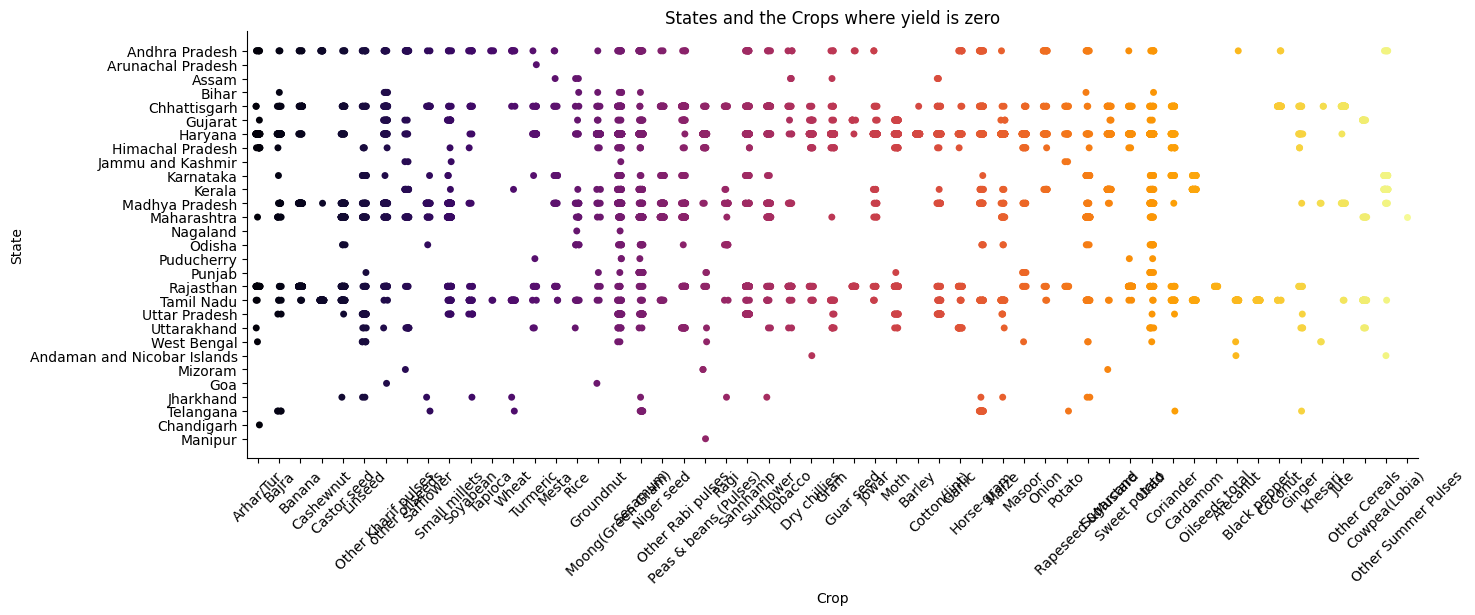

In [25]:
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()

In [26]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

State  \
Crop                                                                       
Arecanut               Andaman and Nicobar IslandsAndaman and Nicobar...   
Arhar/Tur              Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Bajra                  Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Banana                 Andaman and Nicobar IslandsAndaman and Nicobar...   
Barley                 BiharBiharBiharBiharBiharBiharBiharBiharBiharB...   
Black pepper           Andaman and Nicobar IslandsAndaman and Nicobar...   
Cardamom               KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...   
Cashewnut              Andaman and Nicobar IslandsAndaman and Nicobar...   
Castor seed            Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Coconut                Andaman and Nicobar IslandsAndaman and Nicobar...   
Coriander              Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Cotton(lint)           Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Cowpea(Lobia)          Jammu and KashmirJammu and KashmirJammu and Ka...   
Dry Ginger             Andaman and Nicobar IslandsAndaman and Nicobar...   
Dry chillies           Andaman and Nicobar IslandsAndaman and Nicobar...   
Garlic                 BiharBiharBiharBiharBiharBiharBiharBiharBiharB...   
Ginger                 Andaman and Nicobar IslandsAndaman and Nicobar...   
Gram                   Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Groundnut              Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Guar seed              GujaratGujaratGujaratGujaratGujaratGujaratGuja...   
Horse-gram             Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Jowar                  Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Jute                   AssamAssamAssamAssamAssamAssamAssamAssamAssamA...   
Khesari                BiharBiharBiharBiharBiharBiharBiharBiharBiharB...   
Linseed                Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Maize                  Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Masoor                 AssamAssamAssamAssamAssamAssamAssamAssamAssamA...   
Mesta                  Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Moong(Green Gram)      Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Moth                   GujaratGujaratGujaratGujaratGujaratGujaratGuja...   
Niger seed             Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Oilseeds total         Arunachal PradeshArunachal PradeshArunachal Pr...   
Onion                  Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Other Cereals          UttarakhandUttarakhandUttarakhandUttarakhandUt...   
Other Kharif pulses    Andaman and Nicobar IslandsAndaman and Nicobar...   
Other Rabi pulses      Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Other Summer Pulses    MaharashtraMaharashtraMaharashtraMaharashtraMa...   
Peas & beans (Pulses)  AssamAssamAssamAssamAssamAssamAssamAssamAssamA...   
Potato                 Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Ragi                   Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Rapeseed &Mustard      Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Rice                   Andaman and Nicobar IslandsAndaman and Nicobar...   
Safflower              Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Sannhamp               BiharBiharBiharBiharBiharBiharBiharBiharBiharB...   
Sesamum                Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Small millets          Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Soyabean               Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Sugarcane              Andaman and Nicobar IslandsAndaman and Nicobar...   
Sunflower              Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Sweet potato           Andaman and Nicobar IslandsAndaman and Nicobar...   
Tapioca                Andhra PradeshAndhra PradeshAndhra PradeshAndh...   
Tobacco                Andhra PradeshAn

### The amount of Fertilizer used is maximum in Rice Crop
### The second crop to use more fertilizer is Wheat crop

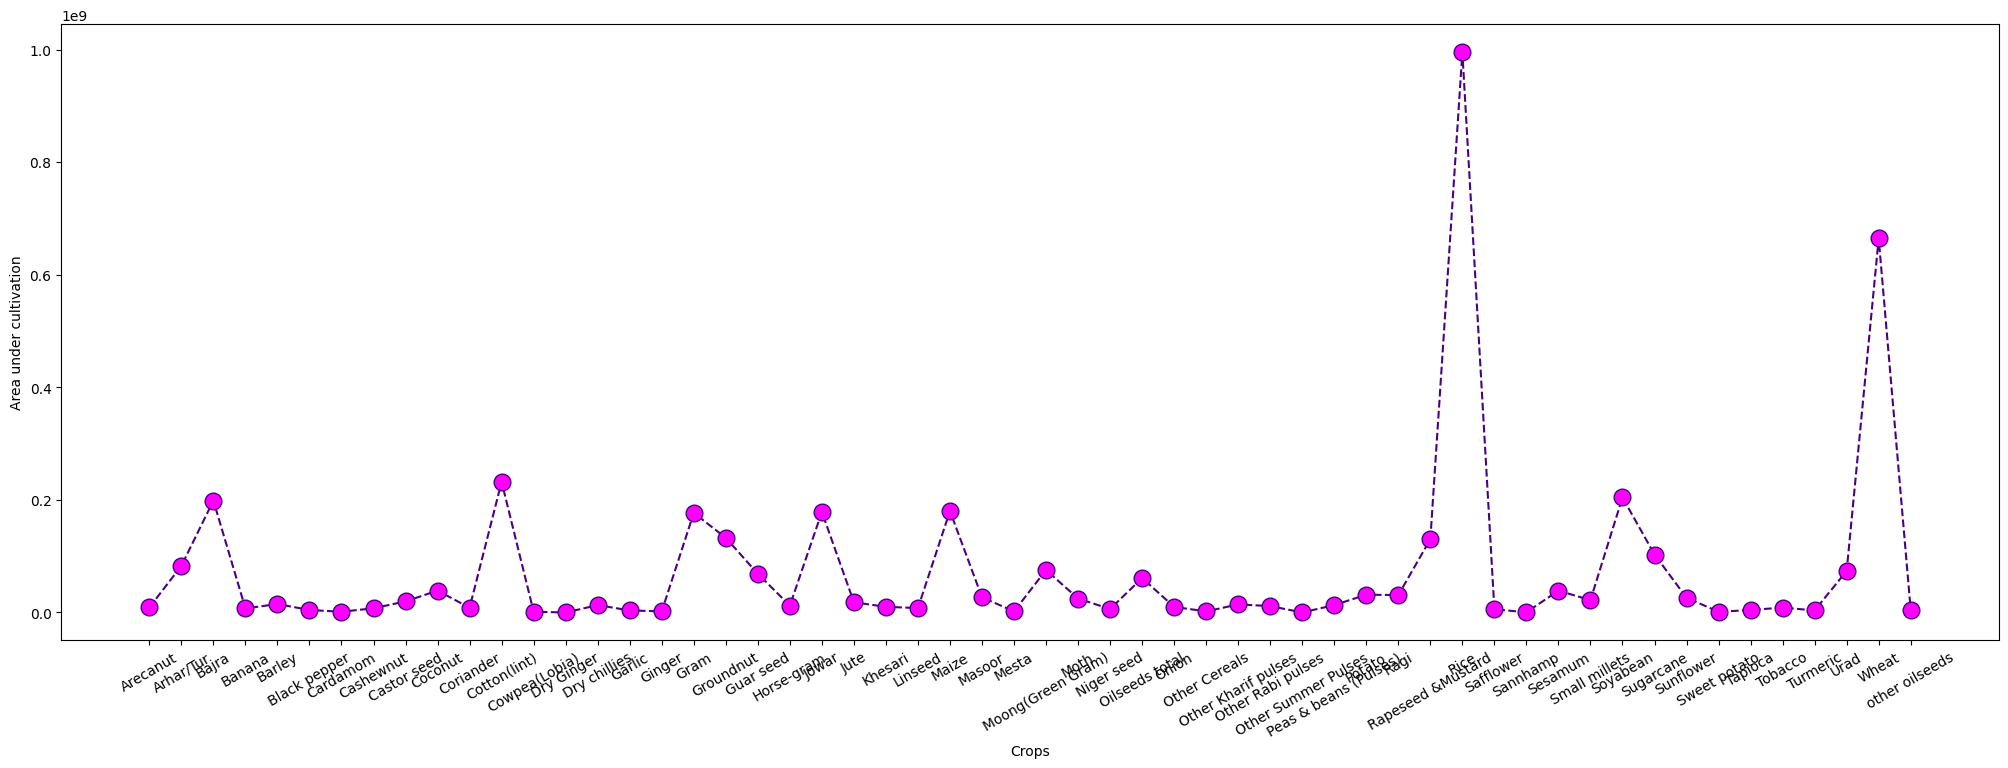

In [28]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

#### Area under cultivation is larger for Rice and Wheat crops

# Analysis of Wheat crop

In [29]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)
df_wheat

State         District   Crop     Year Season    Area  \
0      Andhra Pradesh         ADILABAD  Wheat  2001-02   Rabi  3721.0   
1      Andhra Pradesh         ADILABAD  Wheat  2002-03   Rabi  3267.0   
2      Andhra Pradesh         ADILABAD  Wheat  2003-04   Rabi  3842.0   
3      Andhra Pradesh        ANANTAPUR  Wheat  2001-02   Rabi   307.0   
4      Andhra Pradesh        ANANTAPUR  Wheat  2002-03   Rabi   362.0   
...               ...              ...    ...      ...    ...     ...   
11243     West Bengal  PURBA BARDHAMAN  Wheat  2000-01   Rabi  6310.0   
11244     West Bengal          PURULIA  Wheat  1997-98   Rabi  1895.0   
11245     West Bengal          PURULIA  Wheat  1998-99   Rabi  3736.0   
11246     West Bengal          PURULIA  Wheat  1999-00   Rabi  2752.0   
11247     West Bengal          PURULIA  Wheat  2000-01   Rabi  2979.0   

      Area Units  Production Production Units     Yield  
0        Hectare      3327.0           Tonnes  0.894114  
1        Hectare      3006.0           Tonnes  0.920110  
2        Hectare      2298.0           Tonnes  0.598126  
3        Hectare       213.0           Tonnes  0.693811  
4        Hectare       333.0           Tonnes  0.919890  
...          ...         ...              ...       ...  
11243    Hectare     15280.0           Tonnes  2.421553  
11244    Hectare      2760.0           Tonnes  1.456464  
11245    Hectare      5530.0           Tonnes  1.480193  
11246    Hectare      6928.0           Tonnes  2.517442  
11247    Hectare      7430.0           Tonnes  2.494126  

[11248 rows x 10 columns]

### Checking the co-relation in the dataset using heatmap 

## Fertilizer and Pesticide are showing the same corelation. Hence, have to drop one column to avoid Multicollinearity

# Modelling

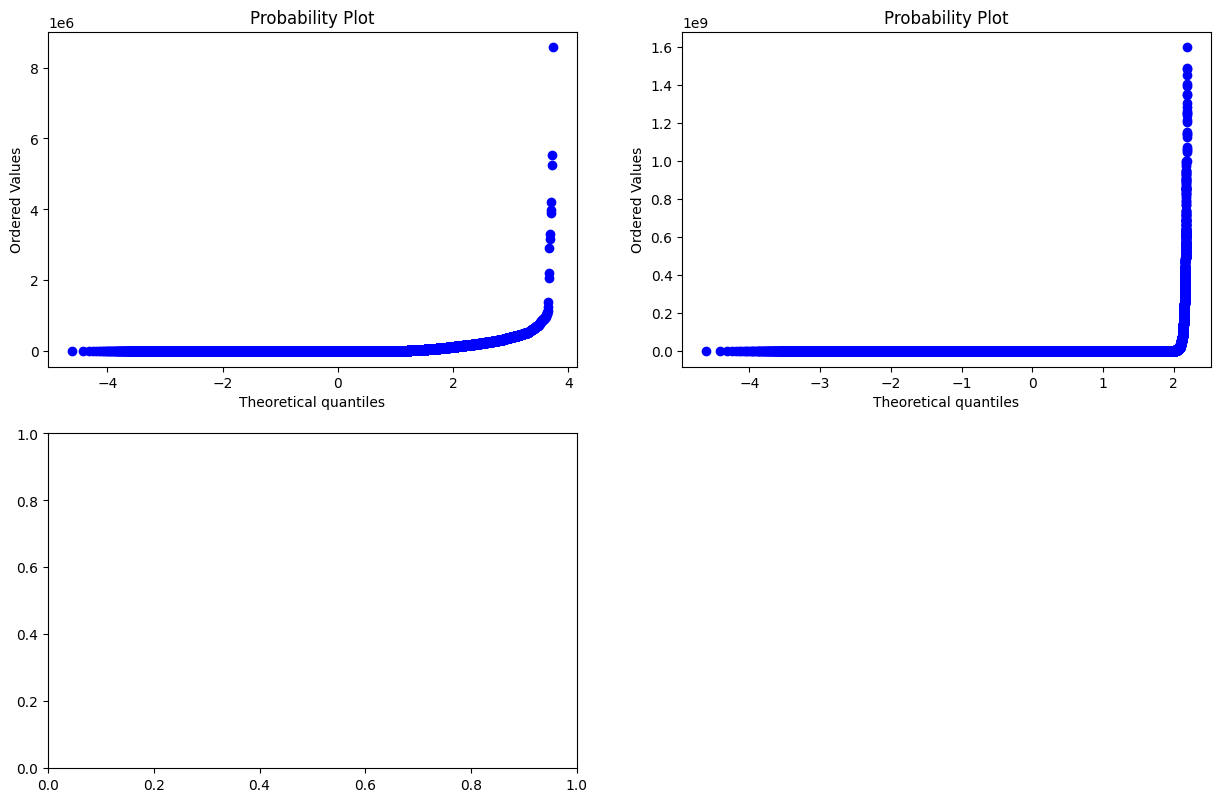

In [33]:
# Q-Q plot of the dataset
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)

plt.show()

### Data distribution have right skewness - to remove skewness using transformation approach
The algorithm is more likely to be biased when the data distribution is skewed

# One-Hot Encoding

In [35]:
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area Units',
       'Production Units'],
      dtype='object')

In [36]:
df1 = pd.get_dummies(df, columns = category_columns, drop_first=True)

In [37]:
df1.shape

(345407, 851)

In [38]:
df1.head()

Area  Production     Yield  State_Andhra Pradesh  \
0  1254.0      2061.0  1.643541                 False   
1  1258.0      2083.0  1.655803                 False   
2  1261.0      1525.0  1.209358                 False   
3  3100.0      5239.0  1.690000                 False   
4  3105.0      5267.0  1.696296                 False   

   State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chandigarh  \
0                    False        False        False             False   
1                    False        False        False             False   
2                    False        False        False             False   
3                    False        False        False             False   
4                    False        False        False             False   

   State_Chhattisgarh  State_Dadra and Nagar Haveli  ...  Year_2018-19  \
0               False                         False  ...         False   
1               False                         False  ...         False   
2               False                         False  ...         False   
3               False                         False  ...         False   
4               False                         False  ...         False   

   Year_2019-20  Year_2020-21  Season_Kharif  Season_Rabi  Season_Summer  \
0         False         False           True        False          False   
1         False         False          False        False          False   
2         False         False          False        False          False   
3         False         False           True        False          False   
4         False         False          False        False          False   

   Season_Whole Year  Season_Winter  Production Units_Nuts  \
0              False          False                  False   
1               True          False                  False   
2               True          False                  False   
3              False          False                  False   
4               True          False                  False   

   Production Units_Tonnes  
0                     True  
1                     True  
2                     True  
3                     True  
4                     True  

[5 rows x 851 columns]

### Split the data into dependent and independent variable

In [39]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [40]:
print(x.shape)
y.shape

(345407, 850)


(345407, 1)

In [41]:
x.head()

Area  Production  State_Andhra Pradesh  State_Arunachal Pradesh  \
0  1254.0      2061.0                 False                    False   
1  1258.0      2083.0                 False                    False   
2  1261.0      1525.0                 False                    False   
3  3100.0      5239.0                 False                    False   
4  3105.0      5267.0                 False                    False   

   State_Assam  State_Bihar  State_Chandigarh  State_Chhattisgarh  \
0        False        False             False               False   
1        False        False             False               False   
2        False        False             False               False   
3        False        False             False               False   
4        False        False             False               False   

   State_Dadra and Nagar Haveli  State_Daman and Diu  ...  Year_2018-19  \
0                         False                False  ...         False   
1                         False                False  ...         False   
2                         False                False  ...         False   
3                         False                False  ...         False   
4                         False                False  ...         False   

   Year_2019-20  Year_2020-21  Season_Kharif  Season_Rabi  Season_Summer  \
0         False         False           True        False          False   
1         False         False          False        False          False   
2         False         False          False        False          False   
3         False         False           True        False          False   
4         False         False          False        False          False   

   Season_Whole Year  Season_Winter  Production Units_Nuts  \
0              False          False                  False   
1               True          False                  False   
2               True          False                  False   
3              False          False                  False   
4               True          False                  False   

   Production Units_Tonnes  
0                     True  
1                     True  
2                     True  
3                     True  
4                     True  

[5 rows x 850 columns]

In [42]:
y.head()

Yield
0  1.643541
1  1.655803
2  1.209358
3  1.690000
4  1.696296

### Splitting  the data set into train and test set

In [43]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [44]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((276325, 850), (69082, 850), (276325, 1), (69082, 1))

# Linear Regression with skewed data

In [47]:
# to store accuracy value
train_accu = []
test_accu = []

# Conclusion

* Machine Learning Algorithm can be used to predict the crop yield in different states
* Challenge is to have the authentic dataset